# PageRank A 
---------------------------------------------

This chapter illustrates chapter 1 in the textbook. 

As always, click the **rocket** symbol and select **Live Code**.

This chapter introduces finite **discrete time Markov chains**.  A DTMC is a sequence of random variables $\{X_0, X_1, X_2, \ldots \}$ that take values in a finite set of **states** ${\cal X}$. The DTMC is specified by the distribution of the initial state $X_0$ (for instance by specifying the value of $X_0$ or indicating how it is selected at random in ${\cal X}$) and the transition probabilities $P(i,j)$ for $i,j \in {\cal X}$.  Here, $P(i,j)$ is the probability that the Markov chain goes from $i$ to $j$ in the next step.  The transition probabilities are often shown in a transition diagram.


## Figure 1.2

[title](Figs/1-2.pdf)

Figure 1.2 illustrates a small web-browsing examples.  There are $5$ web pages: $A, B, C, D, E$.  When on page $A$, the reader is equally likely to go next to page $B$ or to page $D$.  Similarly, when on a given page, the reader is equally likely to follow any of the arrows that go out of the page.  These transitions happen when the reader clicks on one of the links on the page.  One is interested in the sequence of pages that the reader visits. In particular, one would like to rank the pages in decreasing order of their frequency of visits.  This order corresponds to the decreasing "relevance" of the pages.  That is the basic idea of PageRank.

The code simulates the Markov chain shown in Figure 1.2, plots the fraction of time it spends in the different states, and the probability of being in the different states. You can choose the initial state $X_0$ and the number of steps $N$. 

We load necessary libraries and some useful functions.

In [1]:
from IPython.core.display import HTML
import numpy as np
import matplotlib
import scipy
from scipy.stats import norm
from scipy.stats import binom
import pandas as pd
params = {'figure.figsize':(12,6), # These are plot parameters
         'xtick.labelsize': 16,
         'ytick.labelsize':16,
         'axes.titlesize':18,
         'axes.labelsize':18,
         'lines.markersize':4,
         'legend.fontsize': 20}
matplotlib.rcParams.update(params)
from matplotlib import pyplot as plt
import random
from ipywidgets import *

def discreteRV(x,p): # here x = [x[0],...,x[K-1]], p = [p[0], ..., p[K-1]]
    # returns a random value equal to x[k] with probability p[k]
    z = 0
    K = len(x)
    P = np.zeros(K)
    for k in range(K):
        P[k] = sum(p[:k]) # P[0] = p[0], p[1] = p[1], P[2] = p[0] + p[1], ..., P[K-1] = p[0] + ... + p[K-1] = 1
    U = np.random.uniform(0,1) # here is our uniform RV
    for k in range(1,K):
        found = False
        if U < P[k]:
            z = x[k-1]
            found = True
            break
    if not found:
        z = x[K-1]
    return z
        
def MC(N,x0,P):
    # returns X[0], X[1], ..., X[N-1]
    M = len(P) # number of states
    x = np.arange(M) # [0,1,2]: the possible values of X[n]
    X = [0]*N # The successive values of the Markov chain; X[0] = 0
    X[0] = x0
    Q = np.zeros([M,N]) # Q[i,n] will be the probability that X[n] = i
    Q[:,0] = np.identity(M)[x0] # Q[:,0] is the unit vector in direction x0
    for n in range(N-1):
        p = P[X[n]].copy() # we make a fresh copy of P[X[n]] as discreteRV modifies the order of p
                           # otherwise, modifying p would also modify the rows of P
        X[n+1] = discreteRV(x,p)
        Q[:,n+1] = np.einsum('k,kj->j',Q[:,n],P) # the Einstein sum indicates how to manipulate indices
                                                 # np.einsum('ik,kj->i,j',A,B) is the product of A and B
    return X, Q

# We create a plotting function that we use later.
# We define the plots of values V, fraction of times F, and distribution D, if states are 'states'.

def plotMC(N,initialState,P,states,whatToPlot):  # whatToPlot = 'VFD' if we want everything, or a subset
    M = len(P)
    X0 = np.arange(len(states))[states.index(initialState)]
    X,Q = MC(N,X0,P)
    
    
    if 'F' in whatToPlot:
        F = np.zeros([M,N]) # F[i,n] will be the fraction of time that X[m] = i for m in 0, ..., n-1
        for n in range(N): # compute fraction of time in states
            for i in range(M):
                F[i,n] = (n*F[i,n-1] + (i == X[n]))/(n+1)
                
    timeSteps = np.arange(N)
    
    if 'V' in whatToPlot:
        fig, ax = plt.subplots()
        fig.set_figheight(6)
        fig.set_figwidth(12) # We specify the size of the figure
        plt.yticks(np.arange(M), states)
        plt.xlabel("$n$")
        plt.ylabel("$X[n]$")
        plt.title("Markov Chain $X$ with initial state "+initialState)
        plt.scatter(timeSteps,X);
        ax.grid(True)
        plt.show()

    if 'D' in whatToPlot:
        fig, ax = plt.subplots()
        fig.set_figheight(6)
        fig.set_figwidth(12) # We specify the size of the figure
        plt.xlabel("$n$")
        plt.title("Distribution of $X[n]$ with initial state "+initialState)
        for i in range(len(P)):
            ax.scatter(timeSteps, Q[i,:],label='P[X[n] = ' + str(states[i])+ ']')
        ax.legend()
        ax.grid(True)
        plt.show()
    if 'F' in whatToPlot:
        fig, ax = plt.subplots()
        fig.set_figheight(6)
        fig.set_figwidth(12) # We specify the size of the figure
        plt.xlabel("$n$")
        plt.title("Fraction of time in states for $X[n]$ with initial state "+initialState)
        for i in range(len(P)):
            ax.scatter(timeSteps, F[i,:],label='State ' + str(states[i]))
        ax.legend()
        ax.grid(True)
        plt.show()     

print('The libraries loaded successfully')

The libraries loaded successfully


We define the widget to select a markov chain that we simulate in the next cell.

In [2]:
def dummy(X0d, Nd):
    global X0, N
    X0, N = str(X0d), int(Nd)
X0d = widgets.ToggleButtons(options=['A', 'B', 'C', 'D', 'E'],description='$X_0$:',disabled=False,button_style='info',tooltip='Description') 
Nd = widgets.Dropdown(options=['10', '30', '50', '70','100','150','200','250'],value='100',description='N',disabled=False)

z = widgets.interactive(dummy, X0d = X0d, Nd = Nd) 
display(z)

interactive(children=(ToggleButtons(button_style='info', description='$X_0$:', options=('A', 'B', 'C', 'D', 'E…

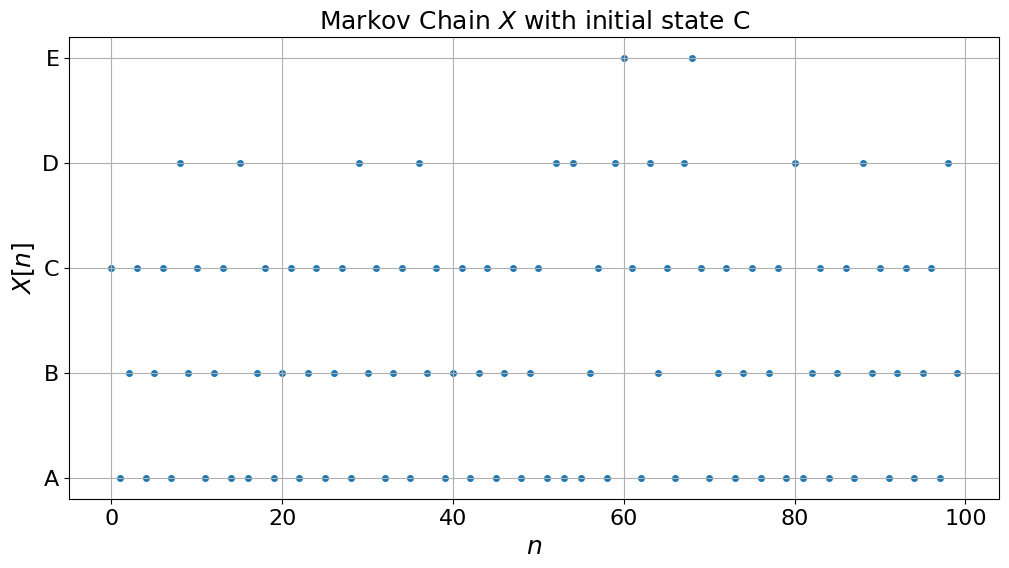

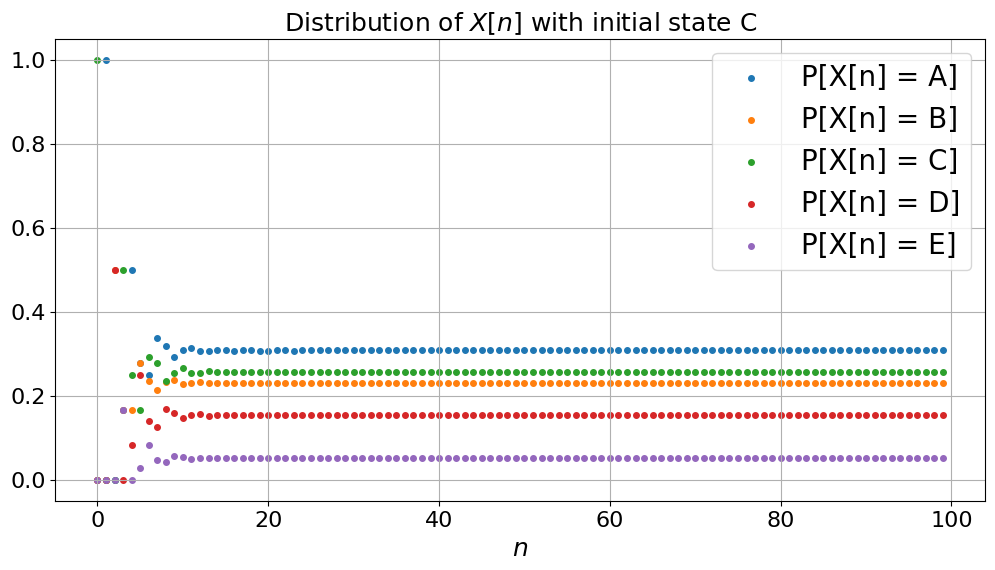

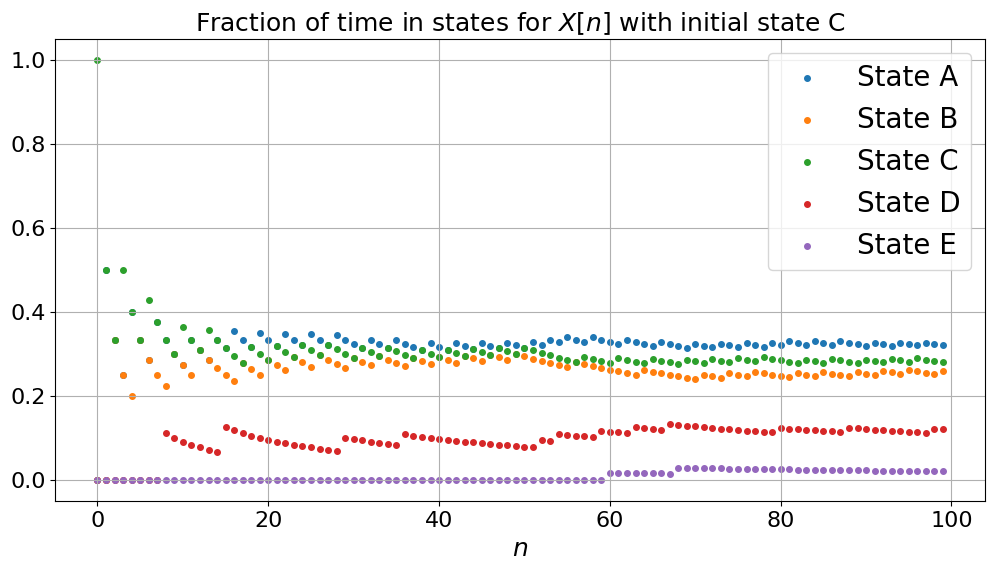

To change the parameter values, go back to the previous cell, 
 adjust widgets, and run this cell again


In [3]:
#We use the plotting function in combination with widgets.

def IplotMC(X0,N):  # Interactive plots with initial state w and duration specified by widgets 
    
    P = [[0,0.5,0,0.5,0], # the transition matrix of the web search graph
    [0,0,1,0,0],
    [1,0,0,0,0],
    [1/3,1/3,0,0,1/3],
    [0,1/2,1/2,0,0]]
    M = len(P)
    
    states = ['A','B','C','D','E']
    plotMC(N,X0,P,states,'VFD')
       
IplotMC(X0,N)   
print('To change the parameter values, go back to the previous cell, \n adjust widgets, and run this cell again')

The **top figure** shows the random sequence of pages that the reader visits.  One cannot predict this sequence exactly since the reader chooses the next steps randomly.  Thus, the actual sequence will vary from experiment to experiment.  

The **middle figure** shows the fraction of time that the reader visits the different pages.  For instance, it plots the number of times during $\{0, 1, \ldots, n\}$ that the reader visited pages $A$ divided by $n + 1$ (the number of steps).  If this ratio is $17\%$ for a particular $n$, it means that the reader visited page $A$ $17\%$ of the time up to step $n$.  These fractions are random, since the sequence is random.  However, the middle figure shows that these fractions converge to some positive numbers.  Moreover, as you can test, these limiting fractions do not depend on the initial state, nor on the actual experiment.  Thus, these limits are relevant to any actual sequence.  The larger the fraction, the most "relevant" the page probably is.  

The **bottom figure** plots the probability of being on the different pages as a function of $n$.  For instance, if the probability of being on page $A$ at time step $n$ is $0.13$, this means that if one were to perform a large number of experiments, then about $13\%$ of them would be on page $A$ at step $n$.  Thus, in contrast with the top and middle figure, the bottom figure plots average values across all possible realizations of the experiment, instead of the values that correspond to one given experiment.  Let $\pi_n(i) = P(X_n = i)$ and $\pi_n$ be the row vector with components $\pi_n(i)$.  Then one has $\pi_{n} = \pi_{n-1} P = \pi_0 P^n$ where $P$ is the matrix of transition probabilities $P(i,j)$.

If you compare the bottom figure and the middle one, you see that 
the fractions of time in the states converge to the same values as the limiting probabilities of being in the states.  Moreover, it turns out that one can calculate this limiting values by solving the balance equations $\pi = \pi P$.  These limiting values indicate the relevance of the pages. Hence, with some simple algebra one can compute the relevance of pages. This is the PageRank algorithm.  The actual implementation by Google features a large number of tweaks to improve the relevance attached to specific keywords when you perform a search.

The fractions of time and $\pi_n$ converge because the Markov chain is **irreducible** and **aperiodic**.|

### Figure 1.5 

![title](Figs/1-5.pdf)

Figure 1.5 shows three different Markov chains.  The code below simulates them and plots the fraction of time in the states.  You select the Markov chain (a), (b), or (c) with the buttons and the number of steps $N$ with the slider. 

In [4]:
def dummy(cased, Nd):
    global case, N
    case, N = str(cased), int(Nd)
cased = widgets.ToggleButtons(options=['(a)', '(b)', '(c)'],description='Case:',disabled=False,button_style='info',tooltip='Description') 
Nd = widgets.Dropdown(options=['10', '30', '50', '70','100','150','200','250'],value='100',description='N',disabled=False)

z = widgets.interactive(dummy, cased = cased, Nd = Nd) 
display(z)

interactive(children=(ToggleButtons(button_style='info', description='Case:', options=('(a)', '(b)', '(c)'), t…

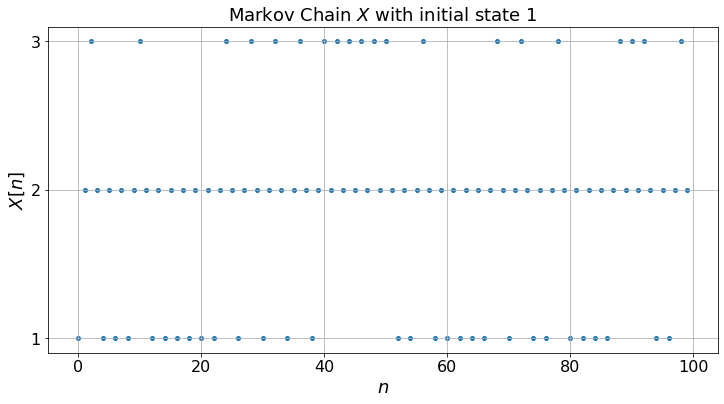

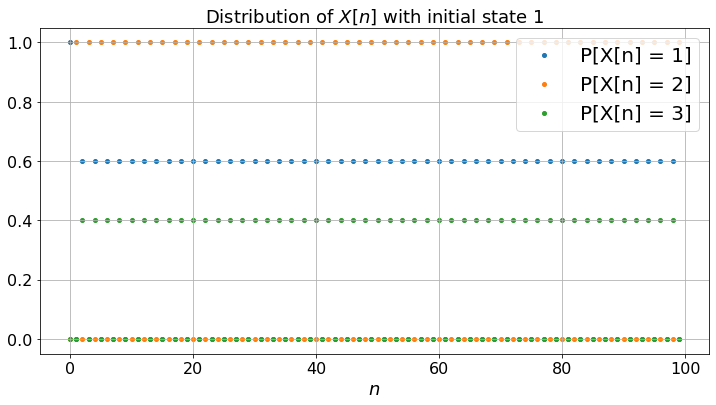

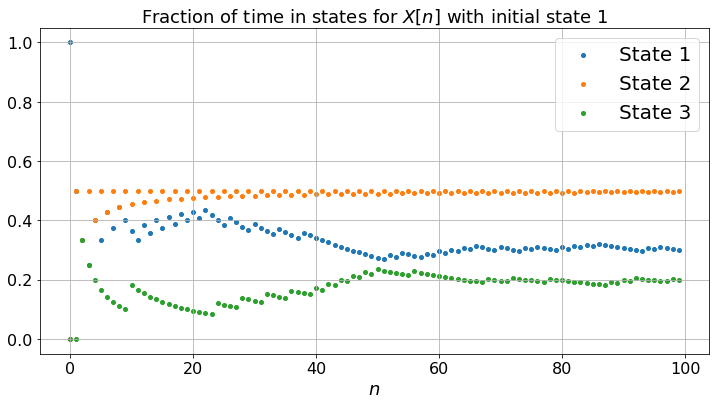

In [5]:
def IplotFigure1_5(case,N):
    p33 = [0,0.1,1][['(a)','(b)','(c)'].index(case)] # specifies P[3,3] as a function of selected case
    states = ['1','2','3']
    P = [[0,1,0],[0.6,0,0.4],[0,1-p33,p33]]
    plotMC(N,'1',P,states,'VFD')
        
IplotFigure1_5(case,N)     

The three Markov chains behave quite differently.  (a) exhibits some periodicity: the state is $2$ for all the odd steps and the probabilities of being in the states do not converge: the Markov chain (a) is **periodic**;   (b) is more smooth and the probabilities converge: it is **aperiodic**; (c) gets trapped in state $3$: it is **not irreducible**. 

Note that for (a), although the probabilities do not converge, the fractions of time converge to limits that do not depend on the experiment nor on the initial state. This is so because the Markov chain is **irreducible**. As in the case of Figure 1.2, one can compute these limits by solving the balance equations.  Thus, fractions of time converge for an irreducible Markov chain even if it is periodic. Also, for any irreducible Markov chain (periodic or not), the balance equations have one and only one solution (that sums to one).


### Figure 1.6

In Figure 1.6, one flips a balanced die.  Here, we show a different example: we flip a loaded coin that has probability $p$ of heads.  We count the fraction of heads after $n$ flips. You can choose $p$ and $N$. 

In [5]:
def dummy(pd, Nd):
    global p, N
    p, N = float(pd), int(Nd)
pd = widgets.Dropdown(options=['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'],value='0.5',description='p',disabled=False)
Nd = widgets.Dropdown(options=['10', '30', '50', '70','100','150','200','250'],value='100',description='N',disabled=False)

z = widgets.interactive(dummy, pd = pd, Nd = Nd) 
display(z)

interactive(children=(Dropdown(description='p', index=4, options=('0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0…

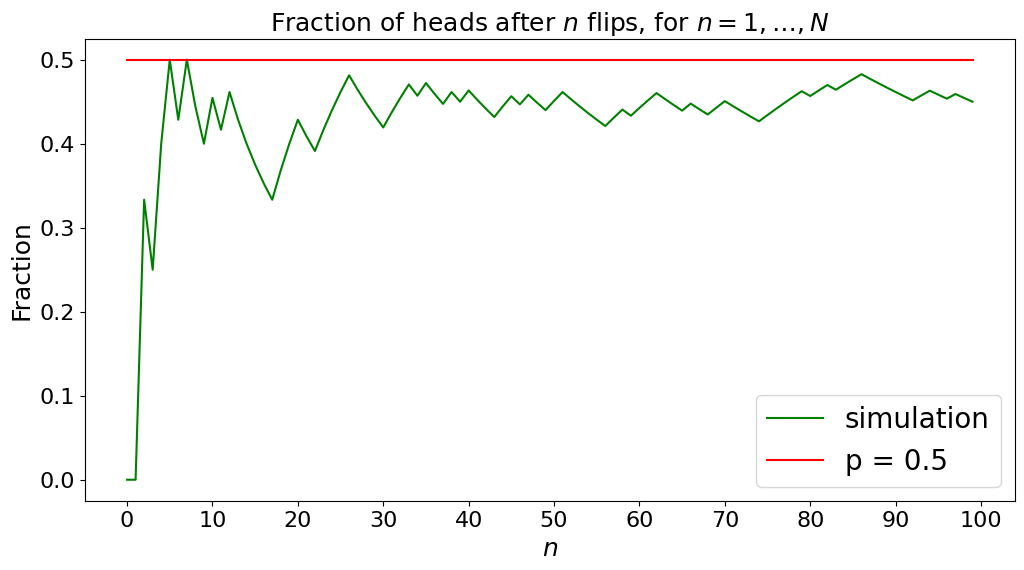

In [6]:
def SLLN_demo(N,p):
    a = np.arange(0.0,N)
    b = np.arange(0.0,N)
    c = np.arange(0.0, N)
    b[0]= np.random.binomial(1,p)
    c[0] = p
    for i in range(0,N-1):
        b[i+1] = (b[i]*(i+1) + np.random.binomial(1,p))/(i+2)
        c[i+1] = p
    colours = ["b","g","r"]
    plt.figure(figsize = (12,6))
    plt.plot(a, b, color=colours[1],label="simulation")
    plt.plot(a, c, color=colours[2],label="p = " + str(p))
    d = [0, N/10, 2*N/10, 3*N/10, 4*N/10, 5*N/10, 6*N/10, 7*N/10, 8*N/10, 9*N/10, N]
    plt.xticks(d)
    plt.legend()
    plt.ylabel("Fraction")
    plt.xlabel("$n$")
    plt.title("Fraction of heads after $n$ flips, for $n = 1, \ldots, N$")
    
SLLN_demo(N,p)


The fraction of heads converges to $p$, for any experiment.  This property is a consequence of the **Strong Law of Large Numbers**.  Note that the same property holds for **irreducible** Markov chains, as we saw in the cases of Figure 1.2 and Figure 1.5(a) and Figure 1.5(b).

You can replace $np.random.binomial(1,p)$ by $np.random.uniform(0,2*p)$ in the code above to verify that the convergence is similar for another distribution.  



